In [1]:
import cv2 as cv
import numpy as np

In [ ]:
class video():

    def __init__(self,shape,frate):
        frame = np.zeros((16,32,3),dtype=np.uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

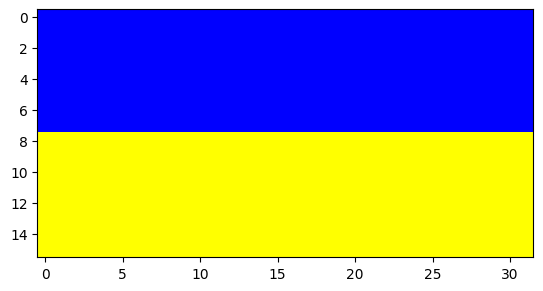

In [16]:
import opencv_jupyter_ui as jcv
import matplotlib.pyplot as plt

frame = np.zeros((16,32,3),dtype=np.uint8)

frame[:8,:,0] = 255

frame[8:,:,1:] = 255

plt.imshow(cv.cvtColor(frame,cv.COLOR_BGR2RGB))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

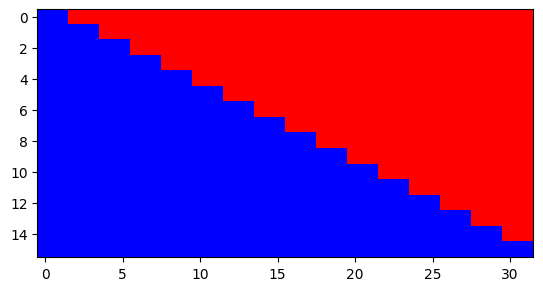

In [22]:
import opencv_jupyter_ui as jcv
import matplotlib.pyplot as plt

frame = np.zeros((16,32,3),dtype=np.uint8)

for i in range(32):
    frame[i//2:,i,0] = 255
    frame[:i//2,i,2] = 255

plt.imshow(cv.cvtColor(frame,cv.COLOR_BGR2RGB))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

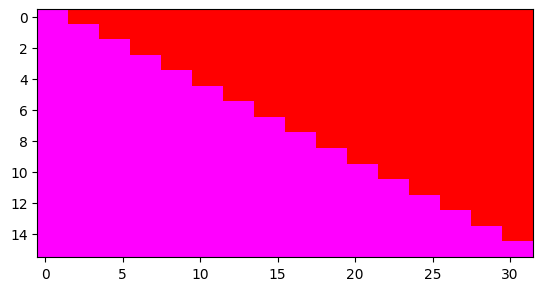

In [26]:
import opencv_jupyter_ui as jcv
import matplotlib.pyplot as plt
from scipy.io import wavfile

frame = np.zeros((16,32,3),dtype=np.uint8)

for i in range(32):
    frame[i//2:,i,0] = 255
    frame[:,i,2] = 255

plt.imshow(cv.cvtColor(frame,cv.COLOR_BGR2RGB))
plt.show

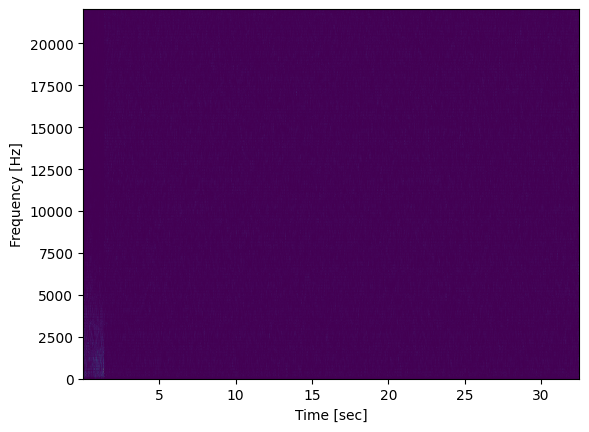

In [41]:
from scipy import signal

srate,data = wavfile.read('project1_2.wav')

# srate = 44.1e3

f, t, Sxx = signal.spectrogram(data[:,1]*1000, srate)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

Using some code from a DSP assignment last year...

/var/folders/n2/g6bh5n915sd_jdfqj491ydl80000gn/T/ipykernel_31863/341744151.py:30: RuntimeWarning: divide by zero encountered in log10
  freq_plot = 10*np.log10(np.abs(plotter.freqSignal()))


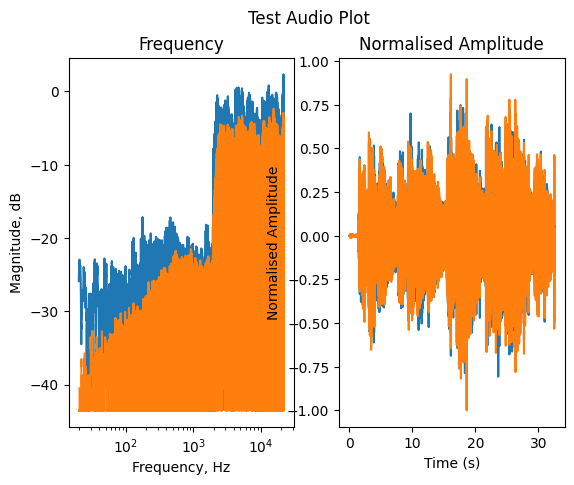

In [73]:
class SignalPlotter:
    def __init__(self,srate,data):
        self.srate, self.data = srate,data
        self.duration = len(self.data)/self.srate
        self.t = np.arange(0, self.duration,1/self.srate)
        self.data_norm = self.data/(max(np.amax(self.data), -np.amin(self.data)))

    def rawSignal(self):
        '''Returns an array for the raw signal'''
        return self.data

    def normSignal(self):
        '''Returns an array for the normalised signal'''
        return self.data_norm

    def freqSignal(self):
        '''Performs fft on normalised signal and returns array'''
        data_norm_f = np.fft.fft(self.data_norm)
        data_norm_f = data_norm_f[:len(data_norm_f)//2]
        return data_norm_f

plotter = SignalPlotter(srate,data)

x_plotter = np.linspace(20, plotter.srate/2, len(plotter.freqSignal()))



fig3, (ax1, ax2) = plt.subplots(1,2)
fig3.suptitle("Test Audio Plot")
freq_plot = 10*np.log10(np.abs(plotter.freqSignal()))
ax1.plot(x_plotter, freq_plot)
ax2.plot(plotter.t, plotter.normSignal())

ax1.set_xscale('log')
# ax2.set_xscale('log')
ax1.set_xlabel("Frequency, Hz")
ax1.set_ylabel("Magnitude, dB")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Normalised Amplitude")
ax1.set_title("Frequency")
ax2.set_title("Normalised Amplitude")
plt.show()

This still needs work but...

Tom's way of displaying a low-res spectrogram is showing promise. Maybe my attmepts to visualise overall frequency spectrum could be used to alter the colour pallette of the spectrogram.

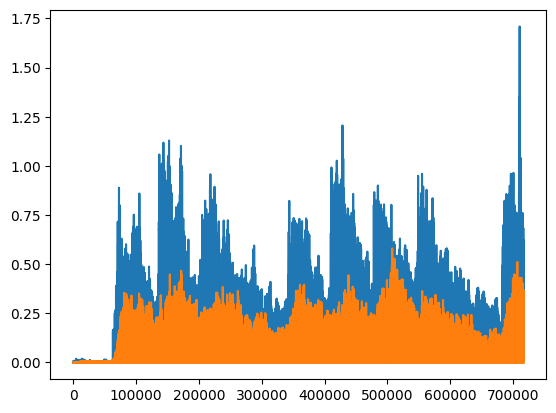

In [77]:
plt.plot(np.abs(plotter.freqSignal()))
plt.show()

In [125]:
freq_spectrum = np.abs(plotter.freqSignal())

print(len(freq_spectrum))

bin_size = len(freq_spectrum)//32

print(bin_size)

bins = np.linspace(0,716981,33)

print(bins)

716981
22405
[     0.       22405.65625  44811.3125   67216.96875  89622.625
 112028.28125 134433.9375  156839.59375 179245.25    201650.90625
 224056.5625  246462.21875 268867.875   291273.53125 313679.1875
 336084.84375 358490.5     380896.15625 403301.8125  425707.46875
 448113.125   470518.78125 492924.4375  515330.09375 537735.75
 560141.40625 582547.0625  604952.71875 627358.375   649764.03125
 672169.6875  694575.34375 716981.     ]


In [126]:
print(len(bins))

33


In [127]:
frame = np.zeros((16,32,3),dtype=np.uint8)

freq_spectrum *= 16/np.amax(freq_spectrum)

for i in range(len(bins)-1):
    bin = np.amax(freq_spectrum[int(bins[i]):int(bins[i+1])])
    print(bin)

    

0.18015394216767217
0.09735801955481589
2.4847097982109427
8.322862492198878
8.046598710214273
4.569586020386936
10.56916996047431
10.312044934470565
5.852298731017267
8.964010817557728
8.367796962762638
6.105679217807365
5.56979405034325
3.635115456625755
3.8431454129394633
7.696692323694612
6.858747659662992
5.0871645516954445
9.61015186186811
11.288537549407115
5.964218847514043
8.42729353026836
7.52777199916788
5.900561680882047
8.984397753276472
8.223424173080923
5.439567297690867
4.556688163095486
3.9317661743291032
3.3792386103598915
8.417308092365301
16.0


<function matplotlib.pyplot.show(close=None, block=None)>

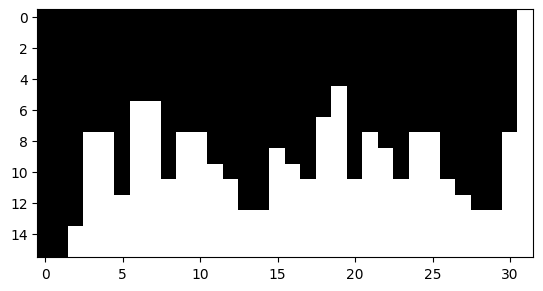

In [128]:
frame = np.zeros((16,32,3),dtype=np.uint8)

freq_spectrum *= 16/np.amax(freq_spectrum) # scale the y-axis to range between 0 and 16

for i in range(len(bins)-1):
    bin = np.amax(freq_spectrum[int(bins[i]):int(bins[i+1])])
    frame[16-int(bin):,i,:] = 255

plt.imshow(cv.cvtColor(frame,cv.COLOR_BGR2RGB))
plt.show

Above is an example of grouping the frequency spectrum into 32 'bins' along the x-axis. If this is animated, it would allow us to display a low resolution FFT on the LED array.

<function matplotlib.pyplot.show(close=None, block=None)>

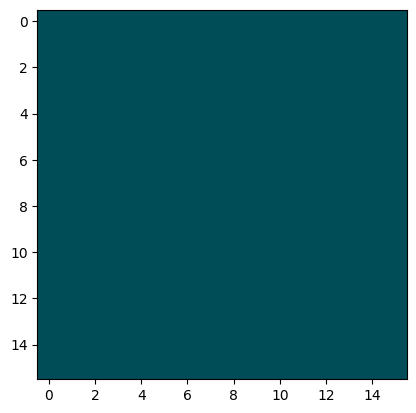

In [111]:
frame = np.zeros((16,16,3),dtype=np.uint8)

freq_spectrum *= 255/np.amax(freq_spectrum)

bins = np.linspace(0,716981,4)

for i in range(len(bins)-1):
    bin = np.amax(freq_spectrum[int(bins[i]):int(bins[i+1])])
    frame[:,:,i] = 255-int(bin)

plt.imshow(cv.cvtColor(frame,cv.COLOR_BGR2RGB))
plt.show

This example above instead makes just three 'bins', essentially breaking the frequency spectrum into low, middle and high frequency ranges. These three values are then used to give values to the three RGB channels of the image. This could be used to provide a colour basis for another element, such as Tom's spectrogram option. Can I combine my two options?

Below, I want to test the creation of the binary low-res FFT all in one panel. My plan is to then create a full image of my specific colour then mask it with this binary image.

<function matplotlib.pyplot.show(close=None, block=None)>

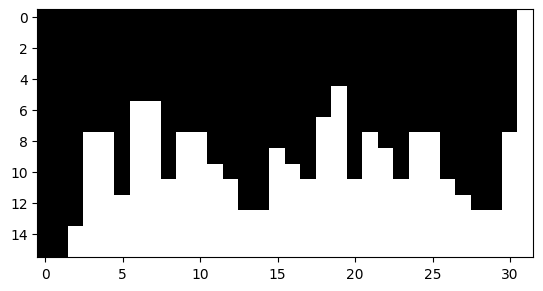

In [138]:
freq_spectrum = np.abs(plotter.freqSignal())
length = len(freq_spectrum)

bins = np.linspace(0,length,33)

mask = np.zeros((16,32,3),dtype=np.uint8)

mask_spectrum = freq_spectrum*(16/np.amax(freq_spectrum)) # scale the y-axis to range between 0 and 16

for i in range(len(bins)-1):
    bin = np.amax(mask_spectrum[int(bins[i]):int(bins[i+1])])
    mask[16-int(bin):,i,:] = 255

plt.imshow(cv.cvtColor(mask,cv.COLOR_BGR2RGB))
plt.show

Great! Now let's

<function matplotlib.pyplot.show(close=None, block=None)>

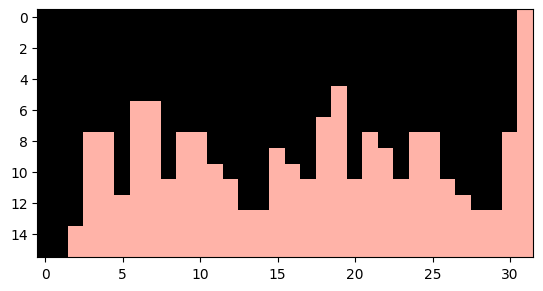

In [144]:
frame = np.zeros((16,32,3),dtype=np.uint8)

colour_spectrum = freq_spectrum*(255/np.amax(freq_spectrum))

colour_bins = np.linspace(0,716981,4)

for i in range(len(bins)-1):
    bin = np.amax(colour_spectrum[int(colour_bins[i]):int(colour_bins[i+1])])
    frame[:,:,i] = int(bin)

frame[mask==0] = 0

plt.imshow(cv.cvtColor(frame,cv.COLOR_BGR2RGB))
plt.show

**Animating**

Now that I've got a method for creating stills this way, I'll incorporate some elements from Sonic Arts last year to animate it with cv.VideoWriter().

In [147]:
n_frame = srate//20
print(n_frame)

2205


In [151]:
out = cv.VideoWriter('video.mp4',cv.VideoWriter.fourcc(*'mp4v'),20,(16,32))

number_of_frames = len(data)//n_frame



for i in range(number_of_frames):
    pntr = i*number_of_frames
    buffer = data[pntr:pntr+number_of_frames]

    if len(buffer) < n_frame:
        break

    buffer_plot = SignalPlotter(buffer)

    bins = np.linspace(0,length,33)

    mask = np.zeros((16,32,3),dtype=np.uint8)

    mask_spectrum = freq_spectrum*(16/np.amax(freq_spectrum)) # scale the y-axis to range between 0 and 16

    for i in range(len(bins)-1):
        bin = np.amax(mask_spectrum[int(bins[i]):int(bins[i+1])])
        mask[16-int(bin):,i,:] = 255

    colour_spectrum = freq_spectrum*(255/np.amax(freq_spectrum))

    colour_bins = np.linspace(0,716981,4)

    for i in range(len(bins)-1):
        bin = np.amax(colour_spectrum[int(colour_bins[i]):int(colour_bins[i+1])])
        frame[:,:,i] = int(bin)

    out.write(frame)

out.release()
cv.destroyAllWindows()
    

    


